3.1. Explorarea Datelor (Exploratory Data Analysis)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setari pentru afisarea graficelor
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Incarca datele
pir_train = pd.read_csv("pirvision_office_train.csv")
pir_test = pd.read_csv("pirvision_office_test.csv")
pir_full = pd.read_csv("pirvision_full.csv")
poluare_train = pd.read_csv("air_pollution2_train.csv")
poluare_test = pd.read_csv("air_pollution2__test.csv")
poluare_full = pd.read_csv("air_pollution2_full.csv")

# Afisam primele randuri din fiecare
print("== PIRvision ==")
display(pir_full.head())

print("== Poluare aer ==")
display(poluare_full.head())


== PIRvision ==


,Timestamp,Day Index,Day,Temp (F),Temp (C),OBS_1,OBS_2,OBS_3,OBS_4,OBS_5,...,OBS_49,OBS_50,OBS_51,OBS_52,OBS_53,OBS_54,OBS_55,OBS_56,OBS_57,Class
0,22:39:12,3,8/8/2024,87,30,10433.0,16205,12054,12039,11552,...,11708,11606,11359,11041,10854,10749,10558,11188,10191,0
1,17:06:33,2,9/8/2024,86,30,10606.0,11036,11256,11187,10925,...,11202,11146,10997,10872,10747,10548,10467,10988,10022,0
2,6:26:03,2,9/8/2024,89,31,NaN,11531,11854,11666,11192,...,11520,11229,10978,10926,10789,10637,10429,11053,10126,0
3,21:59:28,2,9/8/2024,85,29,10578.0,10960,11338,11338,10932,...,11383,11210,10965,10854,10788,10594,10409,11168,10002,0
4,21:42:23,2,9/8/2024,85,29,10353.0,11046,11544,11525,11136,...,11442,11291,11086,10939,10865,10638,10449,11035,9999,0


== Poluare aer ==


,Country Name,City Name,Overall AQI,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,Volatile_Organic_Compounds,Sulfur_Dioxide,Emissions,Overall AQI Level
0,Germany,Amberg,42,1.0,Good,35.0,Good,2,GO,42,Good,91.545761,15.326015,Good,Good
1,Philippines,San Pedro,56,1.0,Good,25.0,Good,2,GO,56,Moderate,136.072125,10.936774,Good,Moderate
2,United States of America,Florida Ridge,48,1.0,Good,16.0,Good,8,GO,48,Good,101.577531,13.950506,Good,Good
3,Thailand,Nong Phai,44,0.0,Good,21.0,Good,0,GO,44,Good,124.743994,-1.142823,Good,Good
4,India,Deoranian,154,4.0,Good,33.0,Good,8,NaN,154,Unhealthy,401.400133,23.842500,Good,Unhealthy


1. Analiza tipului de atribute și a plajei de valori a acestora

In [33]:
# Separam atributele numerice continue pentru PIRvision
pir_numeric = pir_train.select_dtypes(include=["int64", "float64"])
pir_stats = pir_numeric.describe().T
pir_stats["missing_values"] = pir_train[pir_numeric.columns].isna().sum()

# Afisam statistici pentru PIRvision
display(pir_stats)


,count,mean,std,min,25%,50%,75%,max,missing_values
Day Index,8000.0,2.001125,5.297724e-01,1.0,2.0,2.0,2.0,3.0,0
Temp (F),8000.0,80.394750,2.286321e+01,0.0,86.0,86.0,88.0,89.0,0
Temp (C),8000.0,26.701250,1.242631e+01,-17.0,30.0,30.0,31.0,31.0,0
OBS_1,7202.0,298767.516662,4.631447e+06,2613.0,10335.0,10433.0,10563.0,111602625.0,798
OBS_2,8000.0,10959.839000,1.366988e+03,2092.0,10775.0,11000.0,11281.0,16928.0,0
...,...,...,...,...,...,...,...,...,...
OBS_54,8000.0,10585.347125,4.288494e+02,2603.0,10513.0,10596.0,10684.0,16383.0,0
OBS_55,8000.0,10449.253750,4.179482e+02,2602.0,10388.0,10453.0,10523.0,16383.0,0
OBS_56,8000.0,11013.778000,4.554899e+02,2547.0,10928.0,11026.0,11127.0,17146.0,0
OBS_57,8000.0,10027.365500,4.015679e+02,2624.0,9957.0,10033.0,10108.0,15713.0,0


In [34]:
# Pentru Poluare aer - atribute numerice
poluare_numeric = poluare_train.select_dtypes(include=["int64", "float64"])
poluare_stats = poluare_numeric.describe().T
poluare_stats["missing_values"] = poluare_train[poluare_numeric.columns].isna().sum()

# Afisam statistici
display(poluare_stats)


,count,mean,std,min,25%,50%,75%,max,missing_values
Overall AQI,18770.0,71.981726,56.110722,7.000000,39.000000,55.000000,79.000000,500.000000,0
CO AQI Value,18770.0,41.444700,196.121182,0.000000,1.000000,1.000000,2.000000,1001.368367,0
Ozone AQI Value,16900.0,35.372781,28.422401,0.000000,21.000000,31.000000,40.000000,222.000000,1870
NO2 AQI Value,18770.0,3.068727,5.300815,0.000000,0.000000,1.000000,4.000000,91.000000,0
PM2.5 AQI Value,18770.0,68.490996,54.717105,0.000000,35.000000,54.000000,78.000000,500.000000,0
Volatile_Organic_Compounds,18770.0,176.279602,137.198201,-8.563753,92.398163,141.208711,201.670858,1272.469897,0
Sulfur_Dioxide,18770.0,7.503989,10.745942,-20.328019,1.214184,5.572767,10.804549,159.231403,0


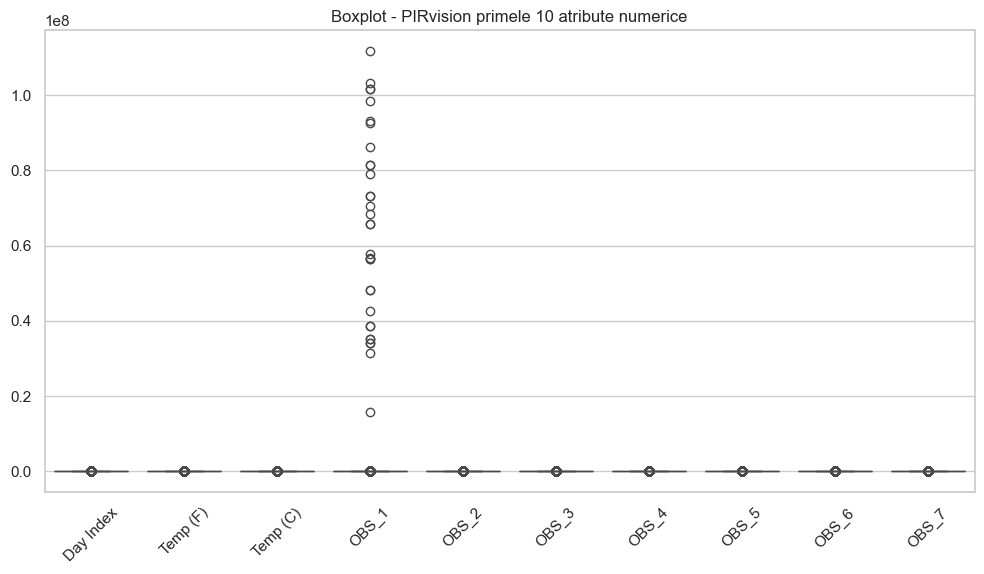

In [35]:
# Boxplot pentru PIRvision
pir_subset = pir_numeric.iloc[:, :10]  # primele 10 coloane (OBS_1–OBS_10)
sns.boxplot(data=pir_subset)
plt.title("Boxplot - PIRvision primele 10 atribute numerice")
plt.xticks(rotation=45)
plt.show()


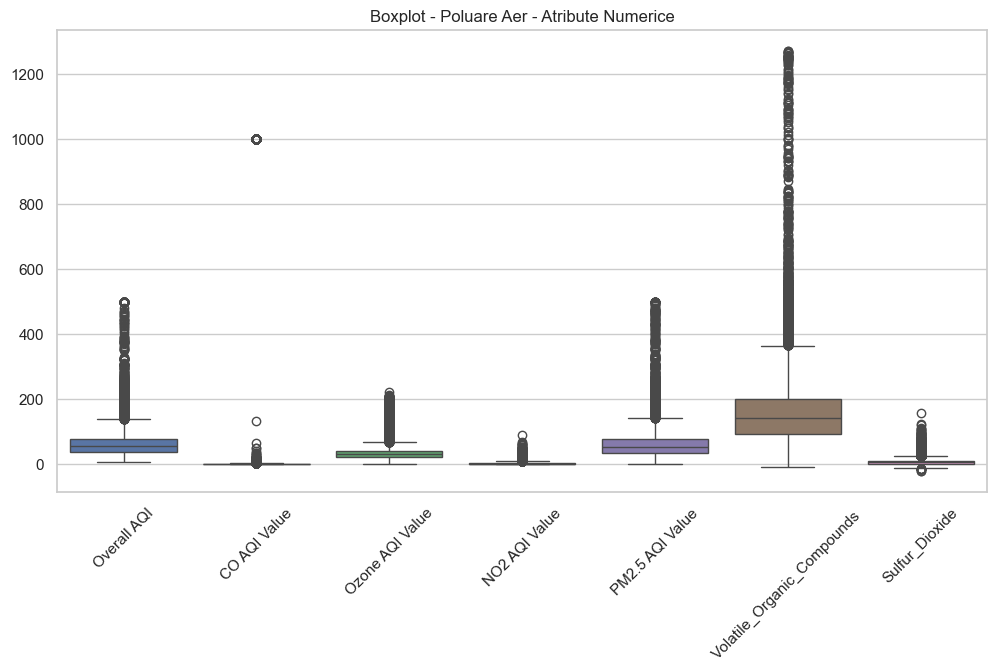

In [36]:
# Boxplot pentru Poluare aer
sns.boxplot(data=poluare_numeric)
plt.title("Boxplot - Poluare Aer - Atribute Numerice")
plt.xticks(rotation=45)
plt.show()


Country Name -> missing: 349, unique: 175


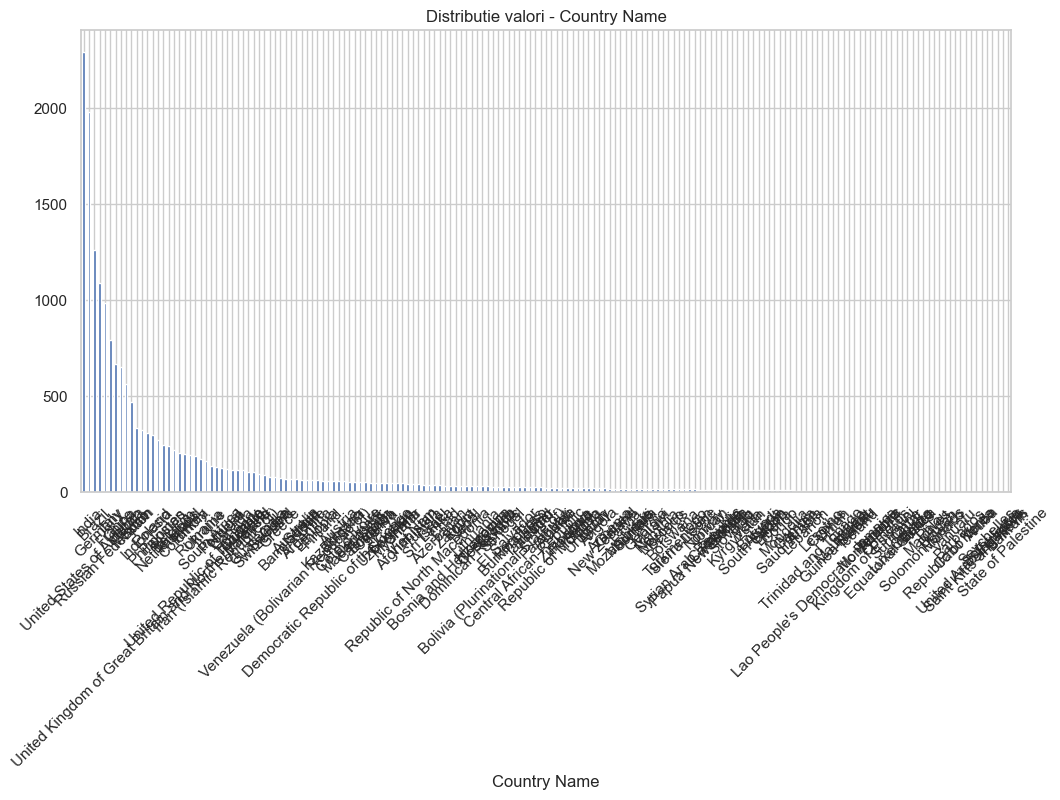

City Name -> missing: 0, unique: 18770


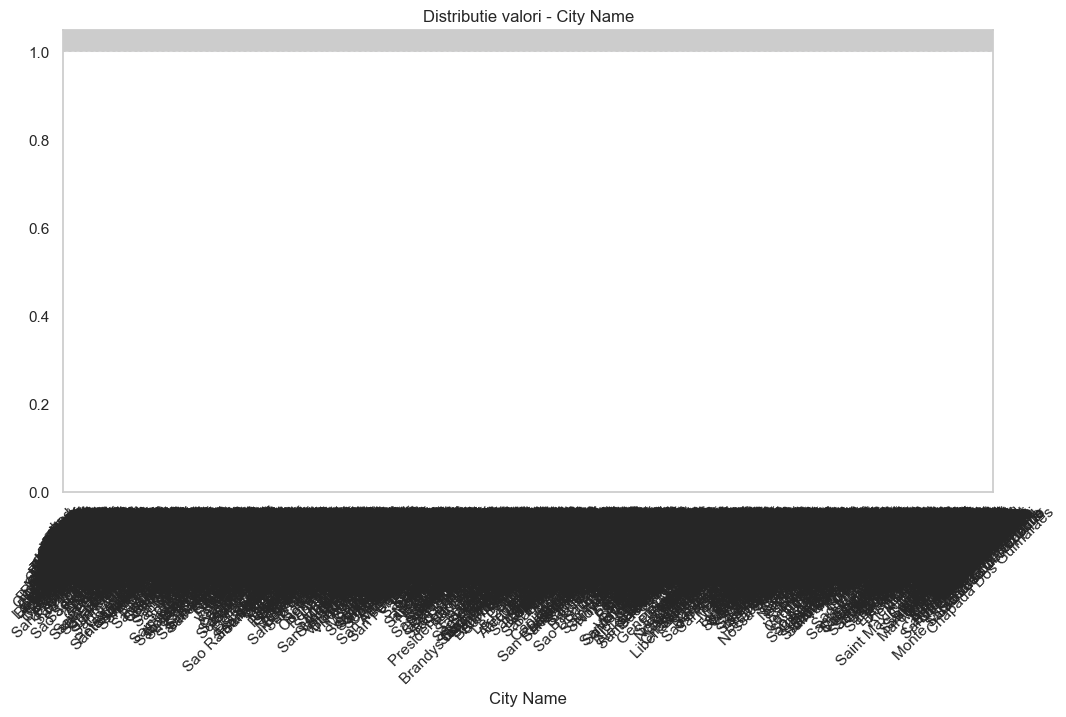

CO AQI Category -> missing: 0, unique: 3


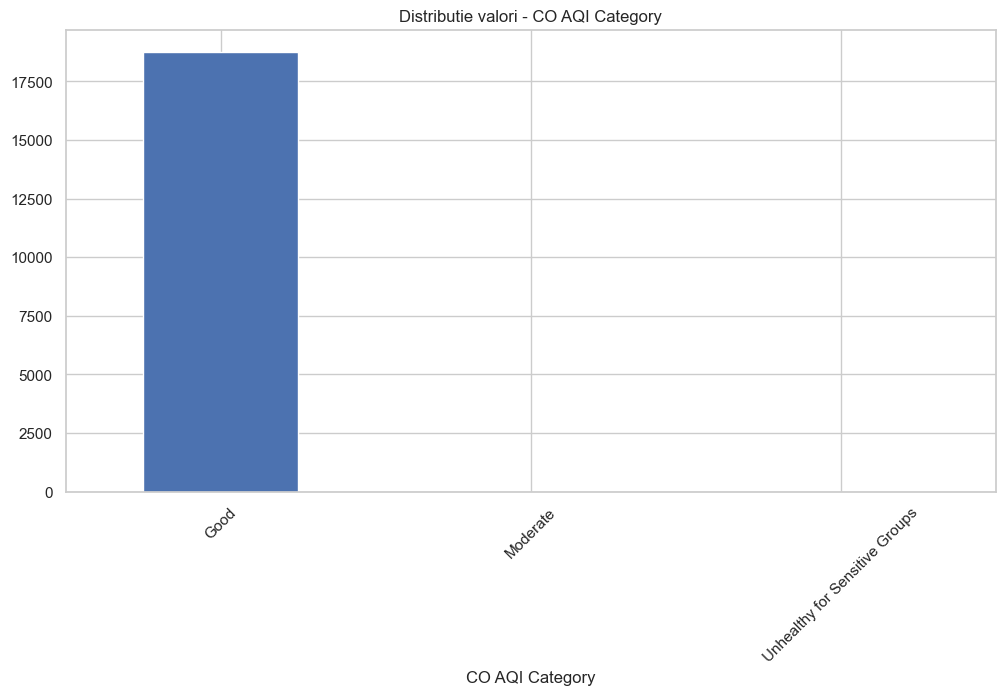

Ozone AQI Category -> missing: 0, unique: 5


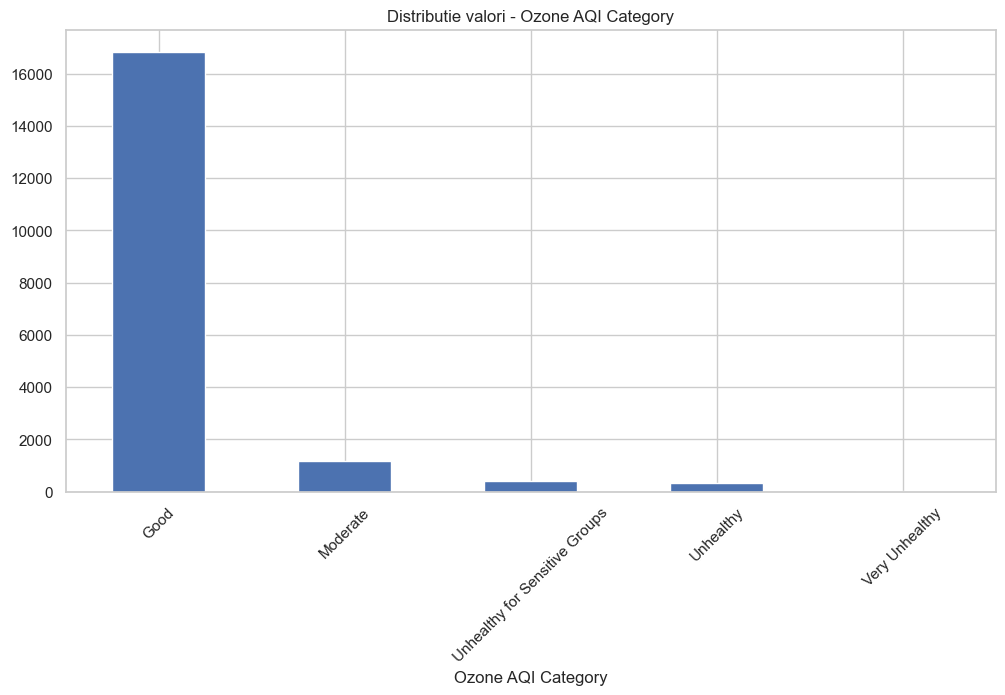

NO2 AQI Category -> missing: 1893, unique: 2


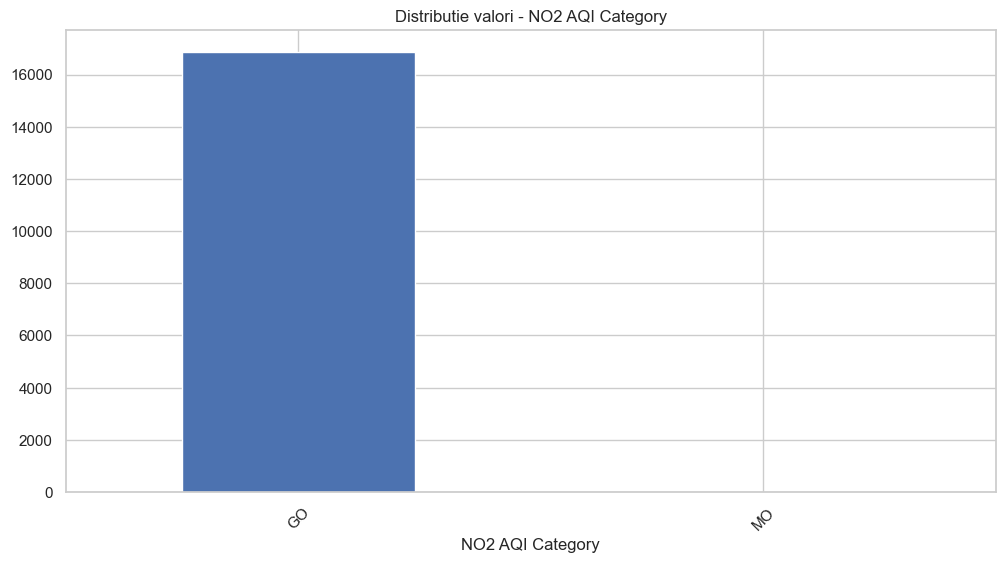

PM2.5 AQI Category -> missing: 0, unique: 6


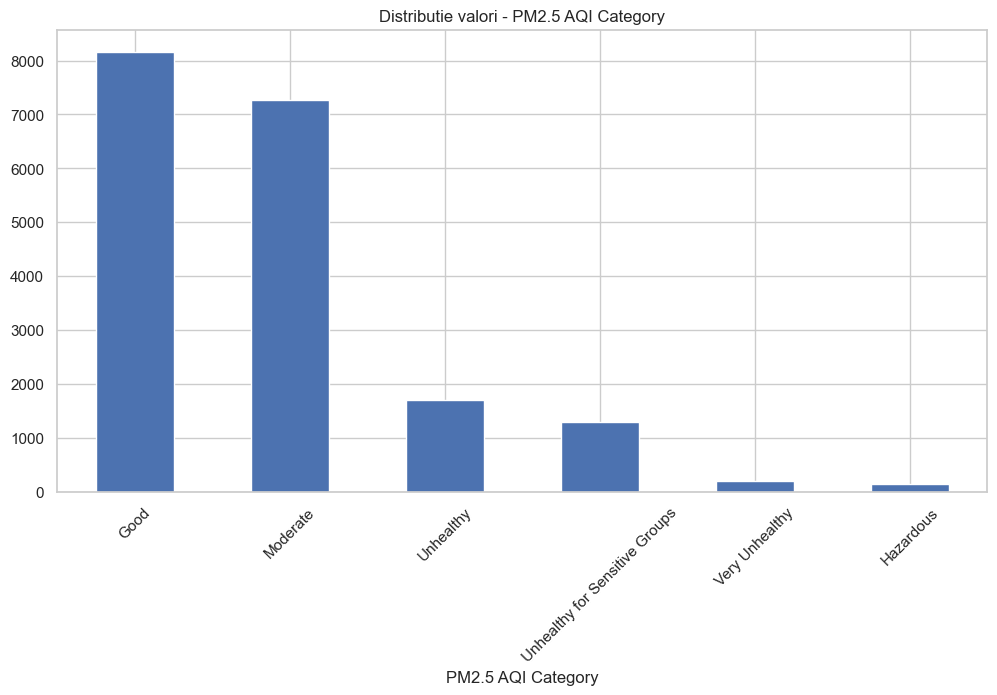

Emissions -> missing: 0, unique: 5


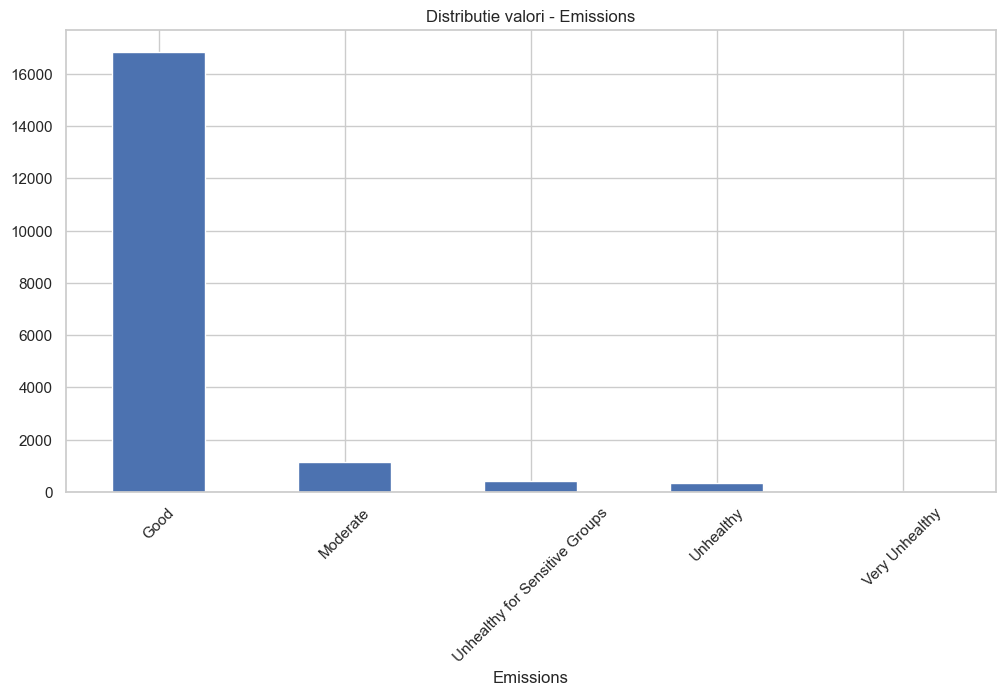

Overall AQI Level -> missing: 0, unique: 6


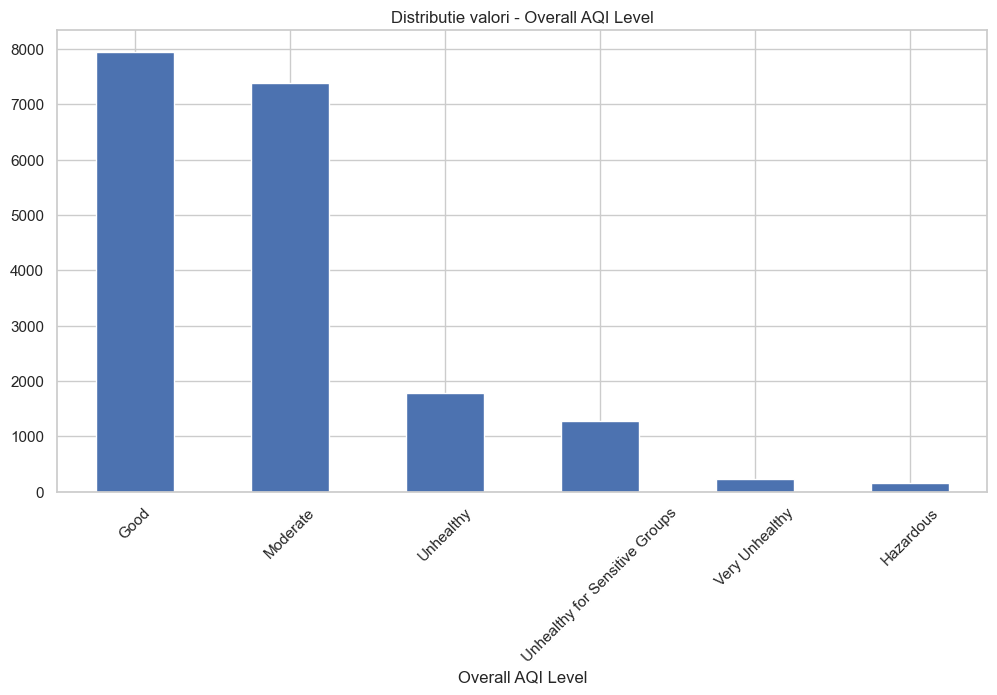

In [37]:
# Atribute categorice din Poluare Aer
poluare_categorice = poluare_train.select_dtypes(include=["object"])
for col in poluare_categorice.columns:
    print(f"{col} -> missing: {poluare_train[col].isna().sum()}, unique: {poluare_train[col].nunique()}")
    poluare_train[col].value_counts().plot(kind="bar")
    plt.title(f"Distributie valori - {col}")
    plt.xticks(rotation=45)
    plt.show()


Toate atributele intr-un tabel

In [38]:
import pandas as pd

# Selectam coloanele de tip object (categorice)
poluare_categorice = poluare_train.select_dtypes(include=["object"])

# Construim tabelul cu valorile cerute
categorical_summary = pd.DataFrame({
    "Atribut": poluare_categorice.columns,
    "Valori lipsa": [poluare_train[col].isna().sum() for col in poluare_categorice.columns],
    "Valori unice": [poluare_train[col].nunique() for col in poluare_categorice.columns]
})

# Afisam tabelul
display(categorical_summary)


,Atribut,Valori lipsa,Valori unice
0,Country Name,349,175
1,City Name,0,18770
2,CO AQI Category,0,3
3,Ozone AQI Category,0,5
4,NO2 AQI Category,1893,2
5,PM2.5 AQI Category,0,6
6,Emissions,0,5
7,Overall AQI Level,0,6


2. Analiza echilibrului de clase

Air pollution - train

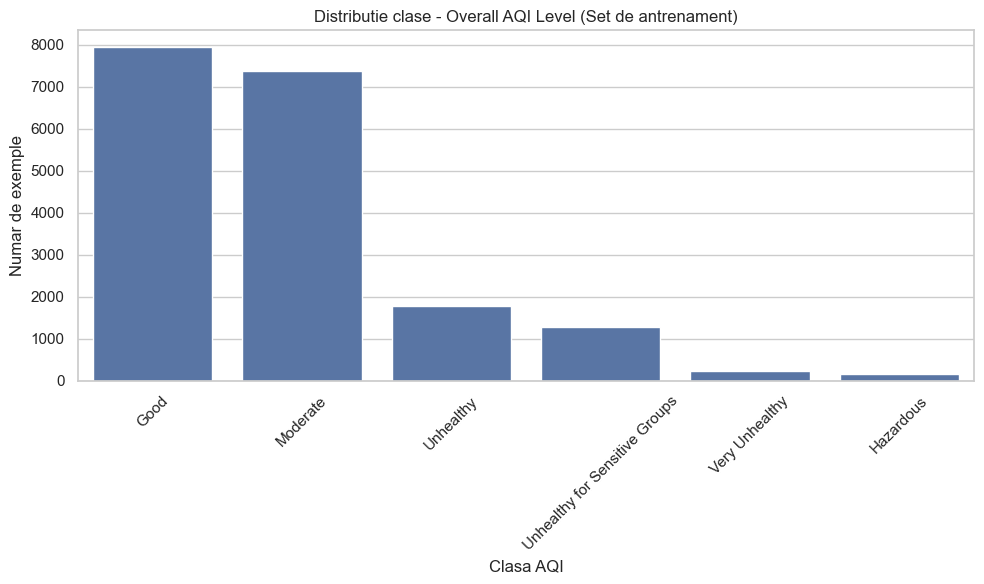

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(
    data=poluare_train,
    x="Overall AQI Level",
    order=poluare_train["Overall AQI Level"].value_counts().index
)

plt.title("Distributie clase - Overall AQI Level (Set de antrenament)")
plt.xlabel("Clasa AQI")
plt.ylabel("Numar de exemple")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Air pollution - test

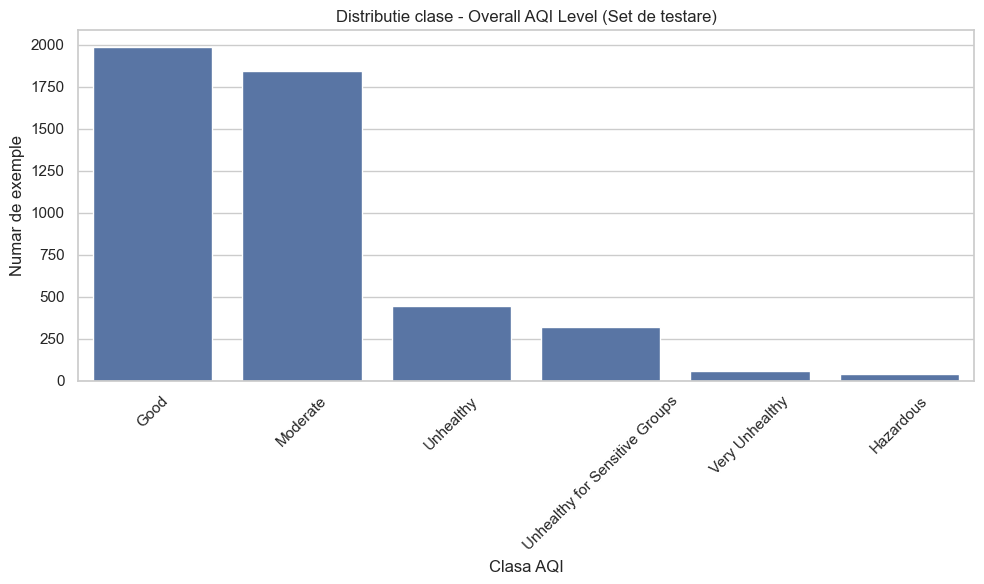

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(
    data=poluare_test,
    x="Overall AQI Level",
    order=poluare_test["Overall AQI Level"].value_counts().index
)

plt.title("Distributie clase - Overall AQI Level (Set de testare)")
plt.xlabel("Clasa AQI")
plt.ylabel("Numar de exemple")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


PIRvision - train

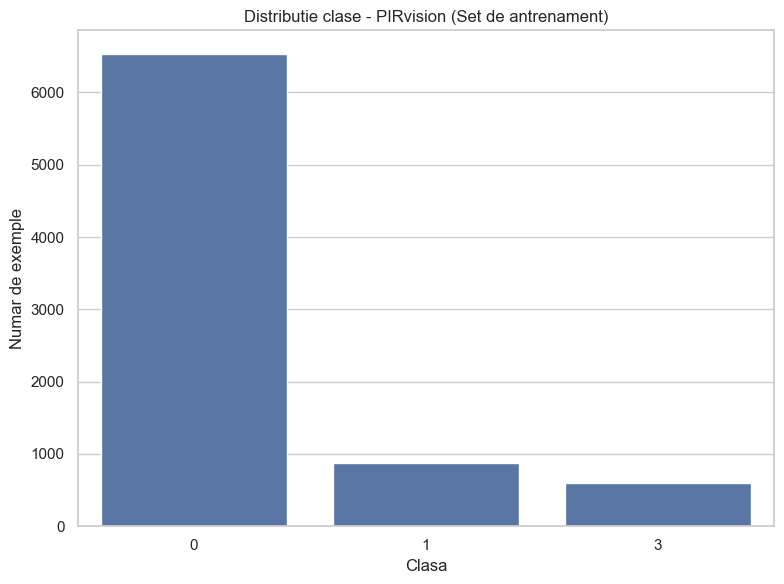

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(
    data=pir_train,
    x="Class",
    order=pir_train["Class"].value_counts().index
)

plt.title("Distributie clase - PIRvision (Set de antrenament)")
plt.xlabel("Clasa")
plt.ylabel("Numar de exemple")
plt.tight_layout()
plt.show()


PIRvision - test

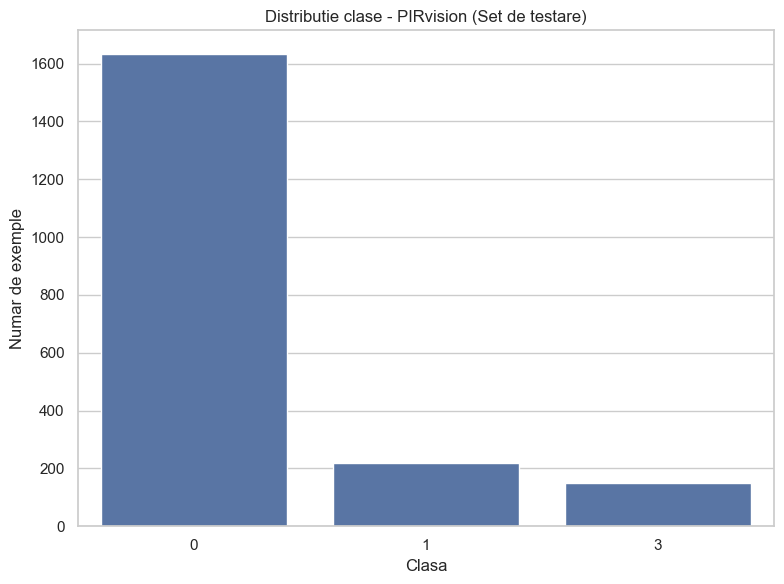

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(
    data=pir_test,
    x="Class",
    order=pir_test["Class"].value_counts().index
)

plt.title("Distributie clase - PIRvision (Set de testare)")
plt.xlabel("Clasa")
plt.ylabel("Numar de exemple")
plt.tight_layout()
plt.show()


3. Analiza corelației între atribute

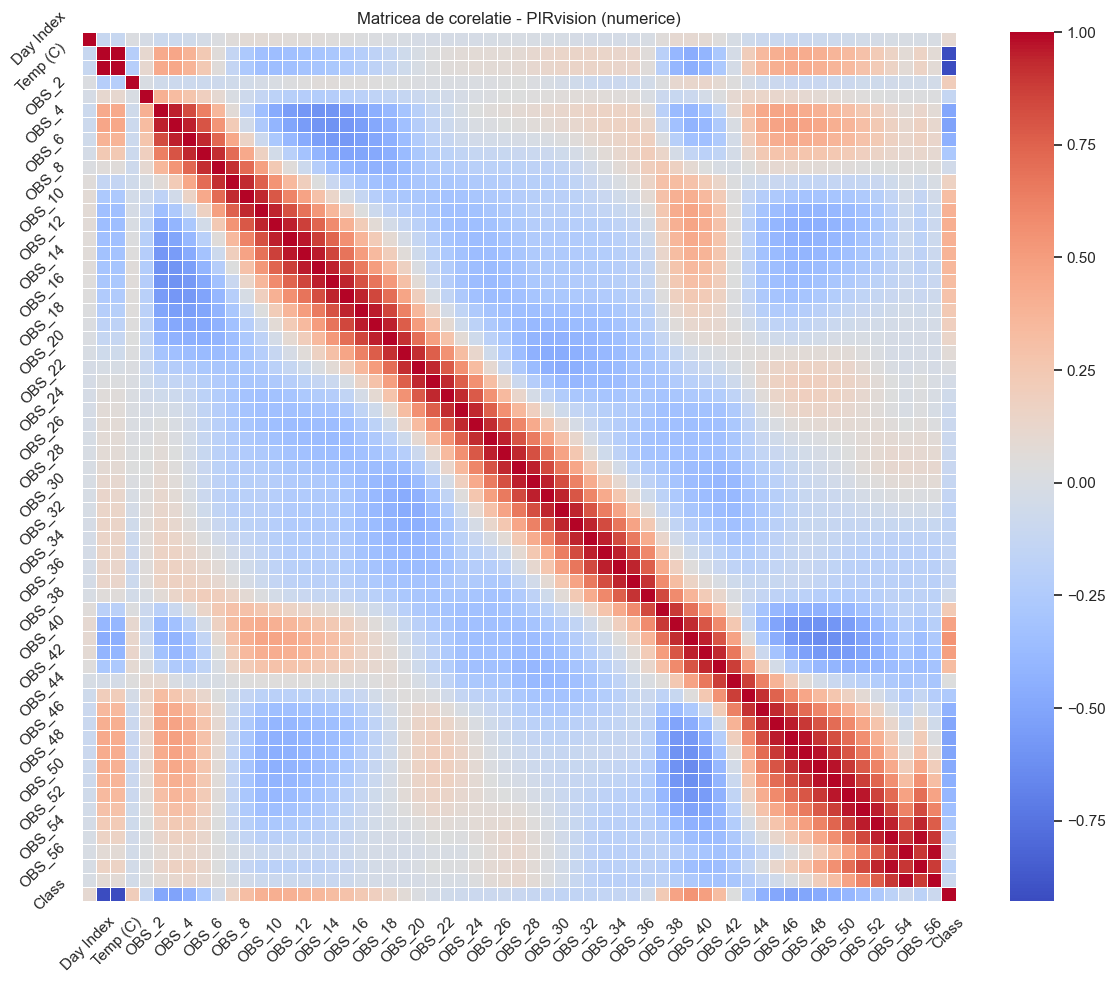

In [43]:
# PIRvision: corelatii intre atribute numerice
pir_numeric = pir_train.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(12, 10))
sns.heatmap(pir_numeric.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matricea de corelatie - PIRvision (numerice)")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


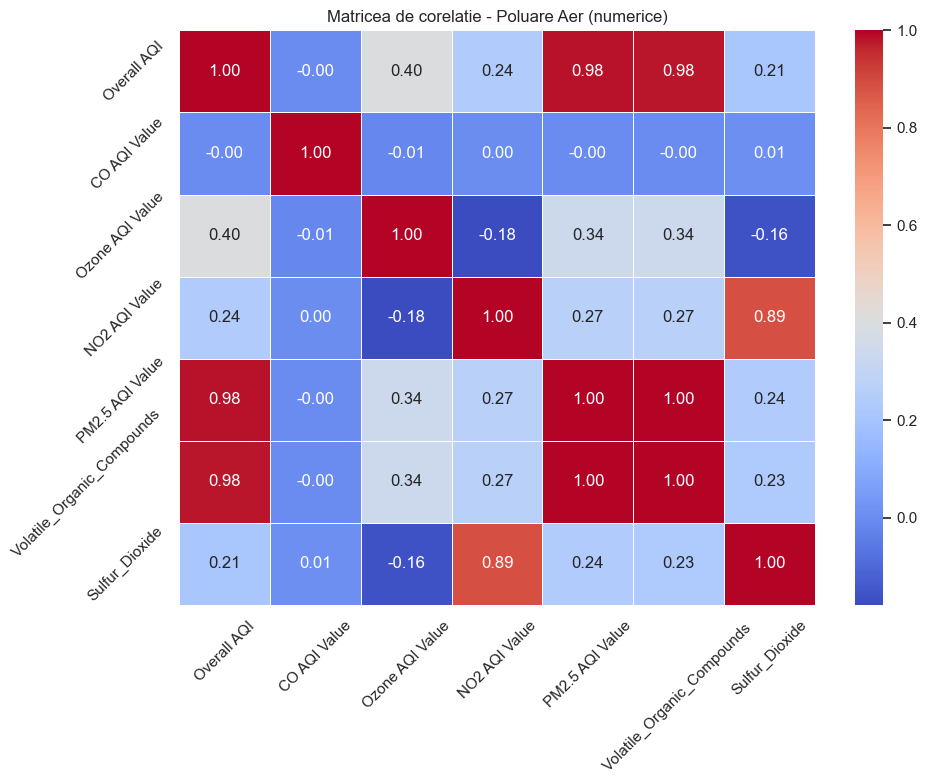

In [44]:
# Poluare aer: corelatii intre atribute numerice
poluare_numeric = poluare_train.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(10, 8))
sns.heatmap(poluare_numeric.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matricea de corelatie - Poluare Aer (numerice)")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


3.2 Preprocesarea datelor
1. Imputarea valorilor lipsă

Date lipsa


In [45]:
# === PIRvision ===
print("PIRvision - Valori lipsa in setul de antrenament:")
missing_pir_train = pir_train.isna().sum()
print(missing_pir_train[missing_pir_train > 0])

print("\nPIRvision - Valori lipsa in setul de testare:")
missing_pir_test = pir_test.isna().sum()
print(missing_pir_test[missing_pir_test > 0])

# === Air Pollution ===
print("\nAir Pollution - Valori lipsa in setul de antrenament:")
missing_pol_train = poluare_train.isna().sum()
print(missing_pol_train[missing_pol_train > 0])

print("\nAir Pollution - Valori lipsa in setul de testare:")
missing_pol_test = poluare_test.isna().sum()
print(missing_pol_test[missing_pol_test > 0])


PIRvision - Valori lipsa in setul de antrenament:
Timestamp    788
Day          790
OBS_1        798
dtype: int64

PIRvision - Valori lipsa in setul de testare:
Timestamp    212
Day          210
OBS_1        202
dtype: int64

Air Pollution - Valori lipsa in setul de antrenament:
Country Name         349
Ozone AQI Value     1870
NO2 AQI Category    1893
dtype: int64

Air Pollution - Valori lipsa in setul de testare:
Country Name         78
City Name             1
Ozone AQI Value     476
NO2 AQI Category    453
dtype: int64


➤ PIRvision

In [46]:
from sklearn.impute import SimpleImputer

# === PIRvision ===
pir_train_target = pir_train["Class"]
pir_test_target = pir_test["Class"]

# excludere coloana "Class" din seturile de date pentru imputare
pir_numeric_train = pir_train.select_dtypes(include=["int64", "float64"]).drop(columns=["Class"], errors="ignore").columns

imputer_pir = SimpleImputer(strategy="mean")

pir_train_imputed = pir_train.copy()
pir_train_imputed[pir_numeric_train] = imputer_pir.fit_transform(pir_train[pir_numeric_train])
pir_train_imputed["Class"] = pir_train_target  # reasignare target

pir_test_imputed = pir_test.copy()
pir_test_imputed[pir_numeric_train] = imputer_pir.transform(pir_test[pir_numeric_train])
pir_test_imputed["Class"] = pir_test_target


➤ Air pollution

In [47]:
# === Poluare aer ===
poluare_target_train = poluare_train["Overall AQI Level"]
poluare_target_test = poluare_test["Overall AQI Level"]

poluare_numeric = poluare_train.select_dtypes(include=["int64", "float64"]).drop(columns=["Overall AQI Level"], errors="ignore").columns
imputer_pol_numeric = SimpleImputer(strategy="mean")

poluare_train_imputed = poluare_train.copy()
poluare_train_imputed[poluare_numeric] = imputer_pol_numeric.fit_transform(poluare_train[poluare_numeric])
poluare_train_imputed["Overall AQI Level"] = poluare_target_train

poluare_test_imputed = poluare_test.copy()
poluare_test_imputed[poluare_numeric] = imputer_pol_numeric.transform(poluare_test[poluare_numeric])
poluare_test_imputed["Overall AQI Level"] = poluare_target_test


In [48]:
# Categorice
poluare_categorice = poluare_train.select_dtypes(include=["object"]).columns
imputer_pol_cat = SimpleImputer(strategy="most_frequent")
poluare_train_imputed[poluare_categorice] = imputer_pol_cat.fit_transform(poluare_train[poluare_categorice])
poluare_test_imputed[poluare_categorice] = imputer_pol_cat.transform(poluare_test[poluare_categorice])


2. Valori extreme pentru un atribut într-un eșantion

In [49]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# === Functii pentru tratare outlieri ===
def remove_outliers_and_fit_imputer(df, numeric_columns):
    df_clean = df.copy()
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean[col] = df_clean[col].mask((df[col] < lower_bound) | (df[col] > upper_bound))
    # Imputare cu media
    imputer = SimpleImputer(strategy="mean")
    df_clean[numeric_columns] = imputer.fit_transform(df_clean[numeric_columns])
    return df_clean, imputer

def apply_outlier_imputer(df, numeric_columns, imputer):
    df_clean = df.copy()
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean[col] = df_clean[col].mask((df[col] < lower_bound) | (df[col] > upper_bound))
    df_clean[numeric_columns] = imputer.transform(df_clean[numeric_columns])
    return df_clean

# Salvam coloana tinta
pir_target_train = pir_train_imputed["Class"]
pir_target_test = pir_test_imputed["Class"]

# Excludem Class din coloane numerice
pir_numeric = pir_train_imputed.select_dtypes(include=["int64", "float64"]).drop(columns=["Class"], errors="ignore").columns

# Aplicam tratarea outlierilor + imputare
pir_train_outliers, imputer_pir_outliers = remove_outliers_and_fit_imputer(pir_train_imputed, pir_numeric)
pir_test_outliers = apply_outlier_imputer(pir_test_imputed, pir_numeric, imputer_pir_outliers)

# Reatasam coloana Class
pir_train_outliers["Class"] = pir_target_train
pir_test_outliers["Class"] = pir_target_test


3. Atribute redundante (puternic corelate)

In [50]:
# === Poluare Aer – definire lipsa ===
poluare_target_train = poluare_train_imputed["Overall AQI Level"]
poluare_target_test = poluare_test_imputed["Overall AQI Level"]

# Excludem tinta din numeric
poluare_numeric = poluare_train_imputed.select_dtypes(include=["int64", "float64"]).drop(columns=["Overall AQI Level"], errors="ignore").columns

# Aplicam tratarea outlierilor + imputare
poluare_train_outliers, imputer_pol_outliers = remove_outliers_and_fit_imputer(poluare_train_imputed, poluare_numeric)
poluare_test_outliers = apply_outlier_imputer(poluare_test_imputed, poluare_numeric, imputer_pol_outliers)

# Reatasam coloana tinta
poluare_train_outliers["Overall AQI Level"] = poluare_target_train
poluare_test_outliers["Overall AQI Level"] = poluare_target_test


In [51]:
import numpy as np

# Functie pentru a elimina coloane numeric corelate (> threshold)
def drop_highly_correlated(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    reduced_df = df.drop(columns=to_drop, errors="ignore")
    return reduced_df, to_drop

# Separam coloana tinta
pir_target = pir_train_outliers["Class"]

# Excludem tinta din numeric
pir_numeric = pir_train_outliers.drop(columns=["Class"], errors="ignore").select_dtypes(include=["int64", "float64"])

# Eliminare atribute corelate
pir_reduced, pir_dropped = drop_highly_correlated(pir_numeric, threshold=0.95)

# Reatasam tinta
pir_reduced["Class"] = pir_target

# Aplicam aceleasi eliminari pe test
pir_test_reduced = pir_test_outliers.drop(columns=pir_dropped, errors="ignore")
pir_test_reduced["Class"] = pir_test_outliers["Class"]

print("Atribute eliminate din PIRvision (corelate > 0.95):")
print(pir_dropped)

# Separam tinta
poluare_target = poluare_train_outliers["Overall AQI Level"]

# Excludem tinta din numeric
poluare_numeric = poluare_train_outliers.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"])

# Eliminare atribute corelate
poluare_reduced, poluare_dropped = drop_highly_correlated(poluare_numeric, threshold=0.9)

# Reatasam tinta
poluare_reduced["Overall AQI Level"] = poluare_target

# Aplicam aceleasi eliminari pe test
poluare_test_reduced = poluare_test_outliers.drop(columns=poluare_dropped, errors="ignore")
poluare_test_reduced["Overall AQI Level"] = poluare_test_outliers["Overall AQI Level"]

print("Atribute eliminate din Poluare Aer (corelate > 0.9):")
print(poluare_dropped)


Atribute eliminate din PIRvision (corelate > 0.95):
['OBS_48', 'OBS_49', 'OBS_50']
Atribute eliminate din Poluare Aer (corelate > 0.9):
['PM2.5 AQI Value', 'Volatile_Organic_Compounds ']


4. Plaje valorice de mărimi diferite pentru atributele numerice

In [52]:
from sklearn.preprocessing import StandardScaler

# === PIRvision ===
scaler_pir = StandardScaler()

# Separam atributele numerice (fara Class)
pir_features = pir_reduced.drop(columns=["Class"], errors="ignore").columns

pir_scaled = pir_reduced.copy()
pir_scaled[pir_features] = scaler_pir.fit_transform(pir_reduced[pir_features])

pir_test_scaled = pir_test_reduced.copy()
pir_test_scaled[pir_features] = scaler_pir.transform(pir_test_reduced[pir_features])


In [53]:
# === Poluare Aer ===
scaler_pol = StandardScaler()

# Separam atributele numerice (fara Overall AQI Level)
poluare_features = poluare_reduced.drop(columns=["Overall AQI Level"], errors="ignore").columns

poluare_scaled = poluare_reduced.copy()
poluare_scaled[poluare_features] = scaler_pol.fit_transform(poluare_reduced[poluare_features])

poluare_test_scaled = poluare_test_reduced.copy()
poluare_test_scaled[poluare_features] = scaler_pol.transform(poluare_test_reduced[poluare_features])


3.3 Utilizarea algoritmilor de Învățare Automată

Arbori de Decizie - PIRvision

y_test_pir


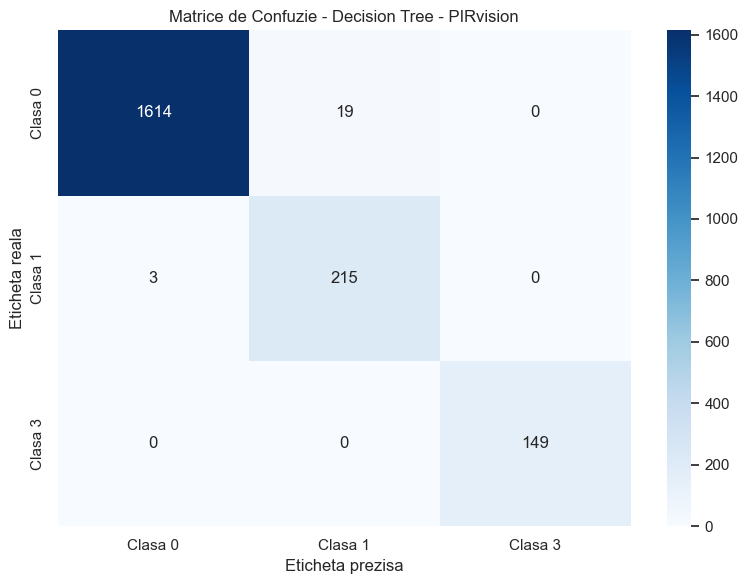

=== Evaluare Decision Tree - PIRvision ===
Acuratete: 0.9890
              precision    recall  f1-score   support

     Clasa 0       1.00      0.99      0.99      1633
     Clasa 1       0.92      0.99      0.95       218
     Clasa 3       1.00      1.00      1.00       149

    accuracy                           0.99      2000
   macro avg       0.97      0.99      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminam coloanele non-numerice
cols_to_drop = ["Class", "Timestamp", "Day"]
X_train_pir = pir_scaled.drop(columns=cols_to_drop, errors="ignore")
X_test_pir = pir_test_scaled.drop(columns=cols_to_drop, errors="ignore")

y_train_pir = pir_scaled["Class"]
y_test_pir = pir_test_scaled["Class"]

# Codificare etichete cu LabelEncoder
le_pir = LabelEncoder()
y_train_encoded = le_pir.fit_transform(y_train_pir)
y_test_encoded = le_pir.transform(y_test_pir)

print("y_test_pir")

# Antrenare model Decision Tree
dt_pir = DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)
dt_pir.fit(X_train_pir, y_train_encoded)

# Predictie si evaluare
y_pred_pir = dt_pir.predict(X_test_pir)

# Matrice de confuzie
conf_mat = confusion_matrix(y_test_encoded, y_pred_pir)
tick_labels = [f"Clasa {c}" for c in le_pir.classes_]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Matrice de Confuzie - Decision Tree - PIRvision")
plt.xlabel("Eticheta prezisa")
plt.ylabel("Eticheta reala")
plt.tight_layout()
plt.show()

# Acuratete si metrice detaliate
print("=== Evaluare Decision Tree - PIRvision ===")
print(f"Acuratete: {accuracy_score(y_test_encoded, y_pred_pir):.4f}")
print(classification_report(y_test_encoded, y_pred_pir, target_names=tick_labels))


Arbori de decizie - Air pollution


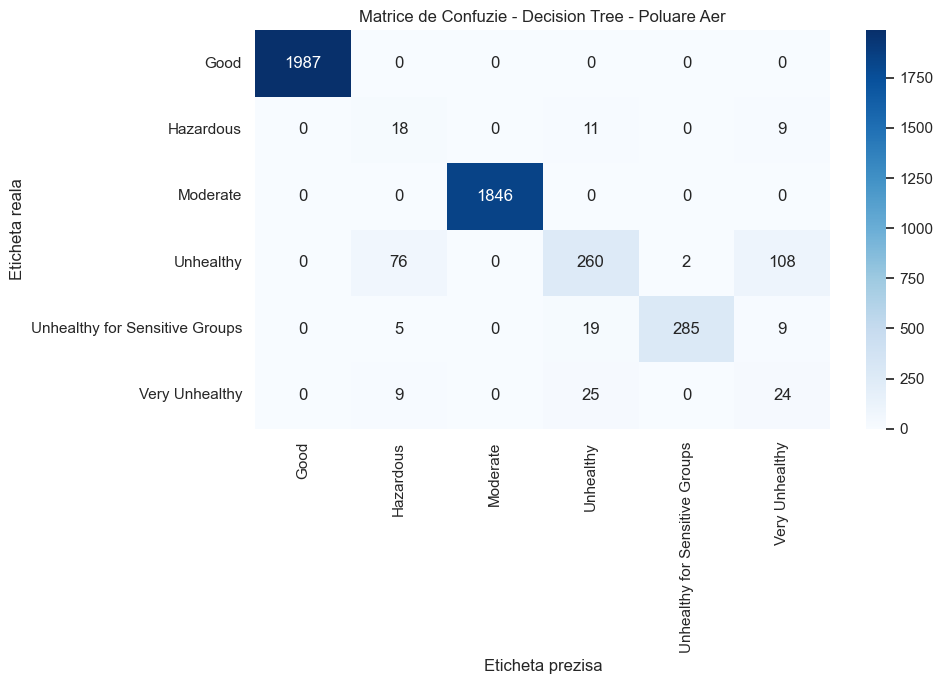

=== Evaluare Decision Tree - Poluare Aer ===
Acuratete: 0.9418
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1987
                     Hazardous       0.17      0.47      0.25        38
                      Moderate       1.00      1.00      1.00      1846
                     Unhealthy       0.83      0.58      0.68       446
Unhealthy for Sensitive Groups       0.99      0.90      0.94       318
                Very Unhealthy       0.16      0.41      0.23        58

                      accuracy                           0.94      4693
                     macro avg       0.69      0.73      0.68      4693
                  weighted avg       0.97      0.94      0.95      4693



In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Pregatire date doar numerice
cols_to_drop = ["Overall AQI Level"]
X_train_pol = poluare_scaled.drop(columns=cols_to_drop, errors="ignore").select_dtypes(include=["int64", "float64"])
X_test_pol = poluare_test_scaled.drop(columns=cols_to_drop, errors="ignore").select_dtypes(include=["int64", "float64"])

# Pregatire date
X_train_pol = poluare_scaled.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"])
X_test_pol = poluare_test_scaled.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"])

y_train_pol = poluare_scaled["Overall AQI Level"]
y_test_pol = poluare_test_scaled["Overall AQI Level"]

# Codificare etichete
le_pol = LabelEncoder()
y_train_encoded = le_pol.fit_transform(y_train_pol)
y_test_encoded = le_pol.transform(y_test_pol)

# Antrenare model
dt_pol = DecisionTreeClassifier(
    criterion="gini",
    max_depth=12,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
)
dt_pol.fit(X_train_pol, y_train_encoded)

# Predictii si evaluare
y_pred_pol = dt_pol.predict(X_test_pol)

# Matrice de confuzie
conf_mat = confusion_matrix(y_test_encoded, y_pred_pol)
tick_labels = [f"{label}" for label in le_pol.classes_]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Matrice de Confuzie - Decision Tree - Poluare Aer")
plt.xlabel("Eticheta prezisa")
plt.ylabel("Eticheta reala")
plt.tight_layout()
plt.show()

# Acuratete si metrice
print("=== Evaluare Decision Tree - Poluare Aer ===")
print(f"Acuratete: {accuracy_score(y_test_encoded, y_pred_pol):.4f}")
print(classification_report(y_test_encoded, y_pred_pol, target_names=tick_labels))


Păduri Aleatoare -PIRvision

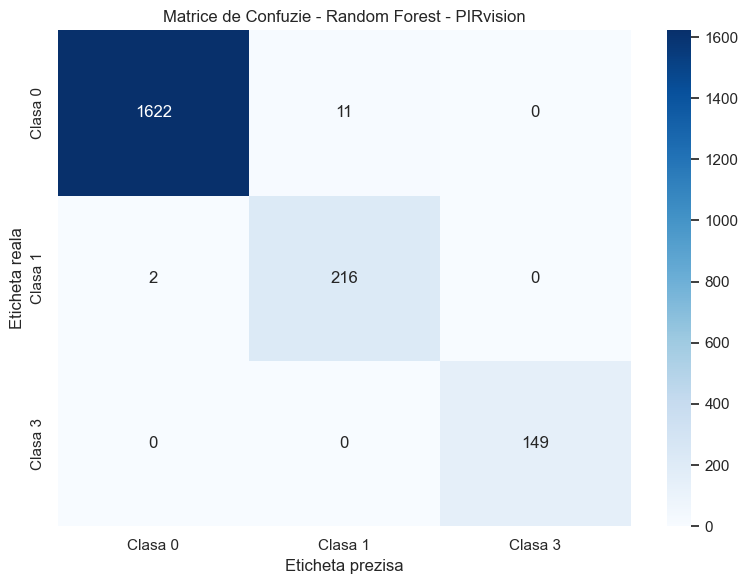

=== Evaluare Random Forest - PIRvision ===
Acuratete: 0.9935
              precision    recall  f1-score   support

     Clasa 0       1.00      0.99      1.00      1633
     Clasa 1       0.95      0.99      0.97       218
     Clasa 3       1.00      1.00      1.00       149

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Pregatire date
X_train_rf = pir_scaled.drop(columns=["Class", "Timestamp", "Day"], errors="ignore")
X_test_rf = pir_test_scaled.drop(columns=["Class", "Timestamp", "Day"], errors="ignore")

y_train_rf = pir_scaled["Class"]
y_test_rf = pir_test_scaled["Class"]

# Codificare etichete
le_rf = LabelEncoder()
y_train_encoded = le_rf.fit_transform(y_train_rf)
y_test_encoded = le_rf.transform(y_test_rf)

# Antrenare Random Forest
rf_pir = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_leaf=5,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42
)
rf_pir.fit(X_train_rf, y_train_encoded)

# Predictii si evaluare
y_pred_rf = rf_pir.predict(X_test_rf)

# Matrice de confuzie
conf_mat = confusion_matrix(y_test_encoded, y_pred_rf)
tick_labels = [f"Clasa {c}" for c in le_rf.classes_]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Matrice de Confuzie - Random Forest - PIRvision")
plt.xlabel("Eticheta prezisa")
plt.ylabel("Eticheta reala")
plt.tight_layout()
plt.show()

# Evaluare
print("=== Evaluare Random Forest - PIRvision ===")
print(f"Acuratete: {accuracy_score(y_test_encoded, y_pred_rf):.4f}")
print(classification_report(y_test_encoded, y_pred_rf, target_names=tick_labels))


Paduri aleatoare - Air Pollution

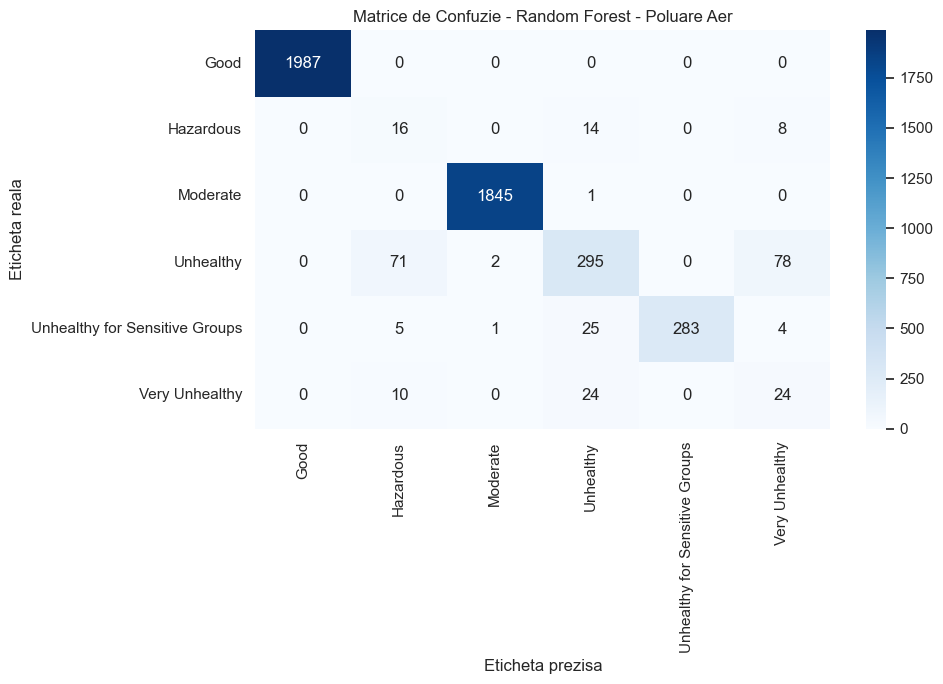

=== Evaluare Random Forest - Poluare Aer ===
Acuratete: 0.9482
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1987
                     Hazardous       0.16      0.42      0.23        38
                      Moderate       1.00      1.00      1.00      1846
                     Unhealthy       0.82      0.66      0.73       446
Unhealthy for Sensitive Groups       1.00      0.89      0.94       318
                Very Unhealthy       0.21      0.41      0.28        58

                      accuracy                           0.95      4693
                     macro avg       0.70      0.73      0.70      4693
                  weighted avg       0.97      0.95      0.96      4693



In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Pregatire date (doar atribute numerice)
X_train_pol = poluare_scaled.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"])
X_test_pol = poluare_test_scaled.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"])

y_train_pol = poluare_scaled["Overall AQI Level"]
y_test_pol = poluare_test_scaled["Overall AQI Level"]

# Codificare etichete
le_pol_rf = LabelEncoder()
y_train_encoded = le_pol_rf.fit_transform(y_train_pol)
y_test_encoded = le_pol_rf.transform(y_test_pol)

# Antrenare Random Forest
rf_pol = RandomForestClassifier(
    n_estimators=100,
    max_depth=14,
    min_samples_leaf=10,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42
)
rf_pol.fit(X_train_pol, y_train_encoded)

# Predictii si evaluare
y_pred_rf = rf_pol.predict(X_test_pol)

# Matrice de confuzie
conf_mat = confusion_matrix(y_test_encoded, y_pred_rf)
tick_labels = le_pol_rf.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Matrice de Confuzie - Random Forest - Poluare Aer")
plt.xlabel("Eticheta prezisa")
plt.ylabel("Eticheta reala")
plt.tight_layout()
plt.show()

# Evaluare
print("=== Evaluare Random Forest - Poluare Aer ===")
print(f"Acuratete: {accuracy_score(y_test_encoded, y_pred_rf):.4f}")
print(classification_report(y_test_encoded, y_pred_rf, target_names=tick_labels))


Regresie Logica - PIRvision

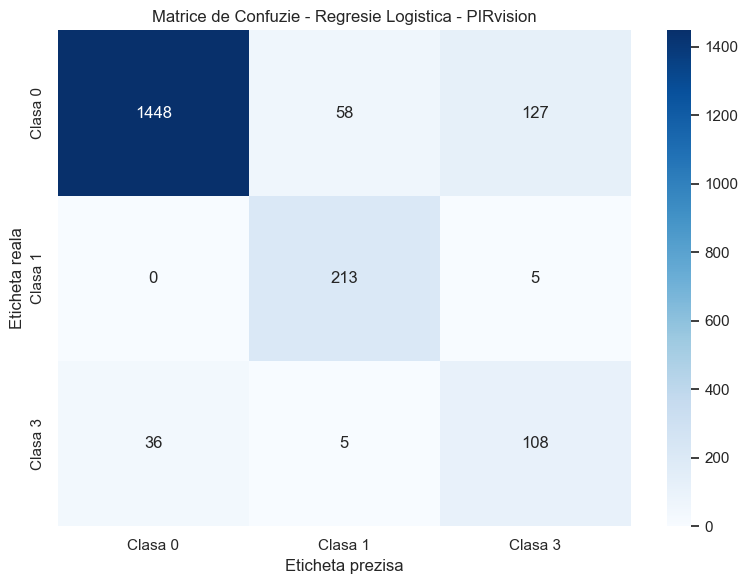

=== Evaluare Regresie Logistica - PIRvision ===
Acuratete: 0.8845
              precision    recall  f1-score   support

     Clasa 0       0.98      0.89      0.93      1633
     Clasa 1       0.77      0.98      0.86       218
     Clasa 3       0.45      0.72      0.56       149

    accuracy                           0.88      2000
   macro avg       0.73      0.86      0.78      2000
weighted avg       0.91      0.88      0.89      2000



In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Pregatire date
X_train_lr = pir_scaled.drop(columns=["Class", "Timestamp", "Day"], errors="ignore")
X_test_lr = pir_test_scaled.drop(columns=["Class", "Timestamp", "Day"], errors="ignore")

y_train_lr = pir_scaled["Class"]
y_test_lr = pir_test_scaled["Class"]

# Codificare etichete
le_lr = LabelEncoder()
y_train_encoded = le_lr.fit_transform(y_train_lr)
y_test_encoded = le_lr.transform(y_test_lr)

# Antrenare model Logistic Regression
lr_pir = LogisticRegression(
    solver="lbfgs",                # optimizator recomandat pentru seturi mici-medii
    max_iter=1000,                 # mai multe iteratii pentru convergenta
    class_weight="balanced",       # compensare pentru clasele dezechilibrate
    random_state=42
)
lr_pir.fit(X_train_lr, y_train_encoded)

# Predictii si evaluare
y_pred_lr = lr_pir.predict(X_test_lr)

# Matrice de confuzie
conf_mat = confusion_matrix(y_test_encoded, y_pred_lr)
tick_labels = [f"Clasa {c}" for c in le_lr.classes_]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Matrice de Confuzie - Regresie Logistica - PIRvision")
plt.xlabel("Eticheta prezisa")
plt.ylabel("Eticheta reala")
plt.tight_layout()
plt.show()

# Evaluare
print("=== Evaluare Regresie Logistica - PIRvision ===")
print(f"Acuratete: {accuracy_score(y_test_encoded, y_pred_lr):.4f}")
print(classification_report(y_test_encoded, y_pred_lr, target_names=tick_labels))


Regresie Logica - Air Pollution


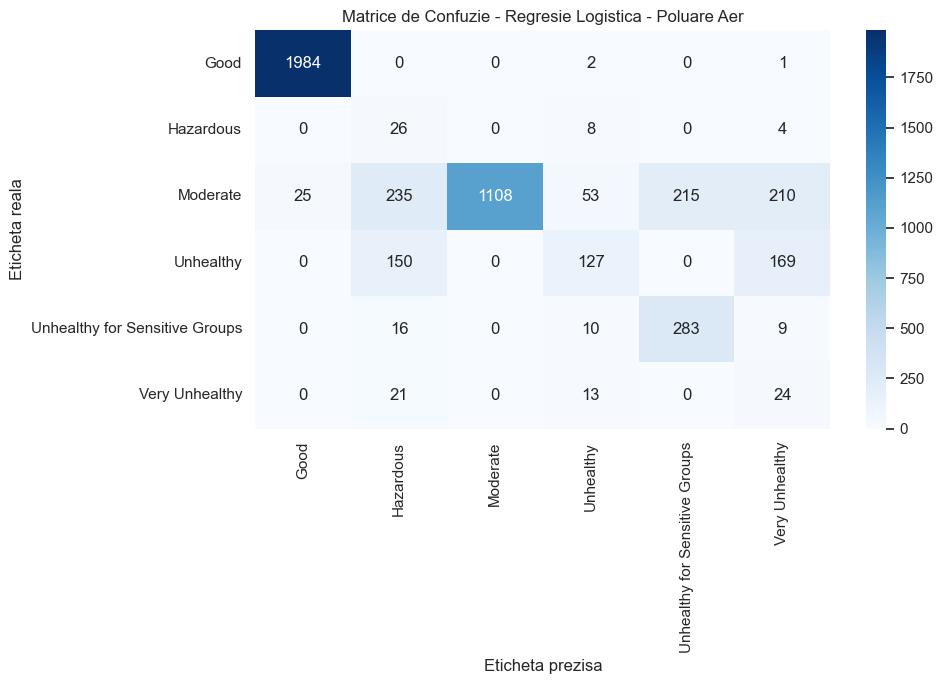

=== Evaluare Regresie Logistica - Poluare Aer ===
Acuratete: 0.7569
                                precision    recall  f1-score   support

                          Good       0.99      1.00      0.99      1987
                     Hazardous       0.06      0.68      0.11        38
                      Moderate       1.00      0.60      0.75      1846
                     Unhealthy       0.60      0.28      0.39       446
Unhealthy for Sensitive Groups       0.57      0.89      0.69       318
                Very Unhealthy       0.06      0.41      0.10        58

                      accuracy                           0.76      4693
                     macro avg       0.54      0.65      0.51      4693
                  weighted avg       0.91      0.76      0.80      4693



In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Pregatire date (doar atribute numerice)
X_train_lr = poluare_scaled.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"])
X_test_lr = poluare_test_scaled.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"])

y_train_lr = poluare_scaled["Overall AQI Level"]
y_test_lr = poluare_test_scaled["Overall AQI Level"]

# Codificare etichete
le_lr = LabelEncoder()
y_train_encoded = le_lr.fit_transform(y_train_lr)
y_test_encoded = le_lr.transform(y_test_lr)

# Antrenare model Logistic Regression
lr_pol = LogisticRegression(
    solver="lbfgs",
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)
lr_pol.fit(X_train_lr, y_train_encoded)

# Predictii si evaluare
y_pred_lr = lr_pol.predict(X_test_lr)

# Matrice de confuzie
conf_mat = confusion_matrix(y_test_encoded, y_pred_lr)
tick_labels = le_lr.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Matrice de Confuzie - Regresie Logistica - Poluare Aer")
plt.xlabel("Eticheta prezisa")
plt.ylabel("Eticheta reala")
plt.tight_layout()
plt.show()

# Evaluare
print("=== Evaluare Regresie Logistica - Poluare Aer ===")
print(f"Acuratete: {accuracy_score(y_test_encoded, y_pred_lr):.4f}")
print(classification_report(y_test_encoded, y_pred_lr, target_names=tick_labels))


Multi-Layered Perceptron (MLP) - PIRvision

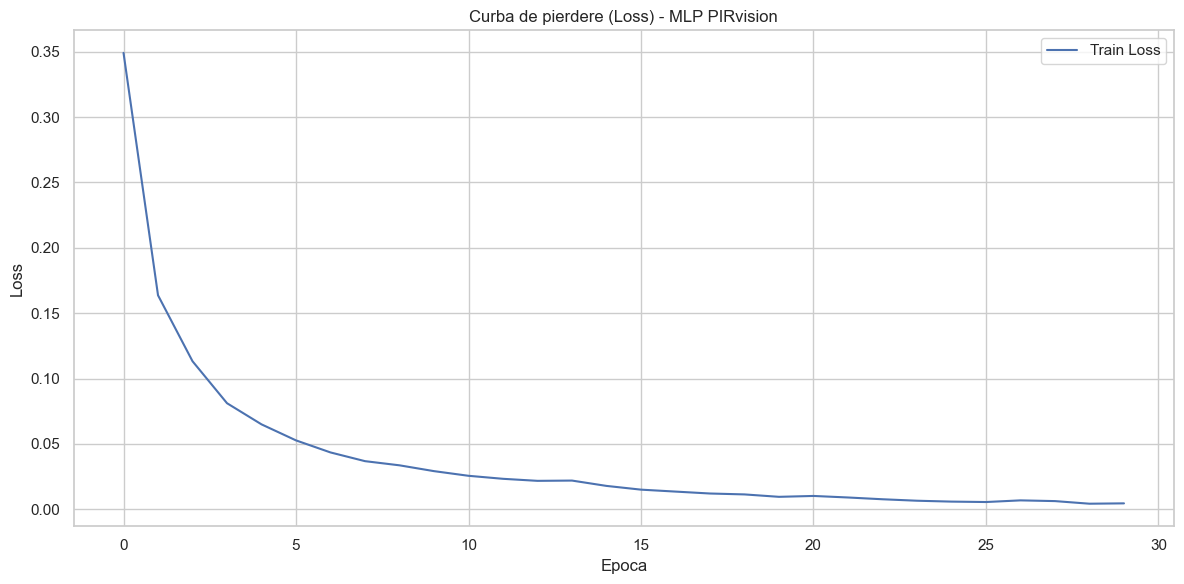

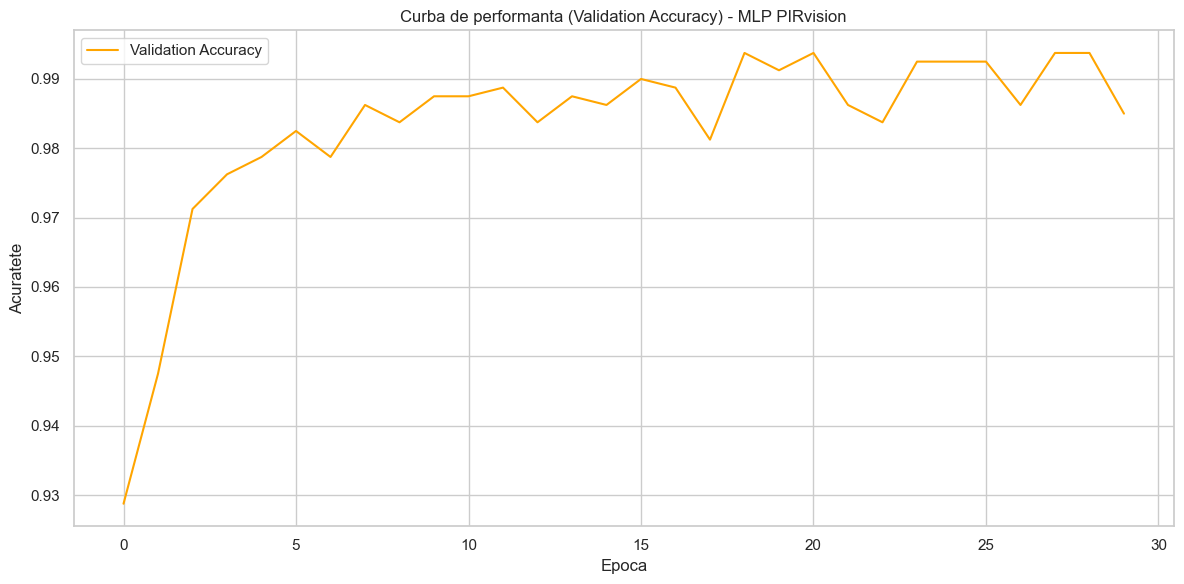

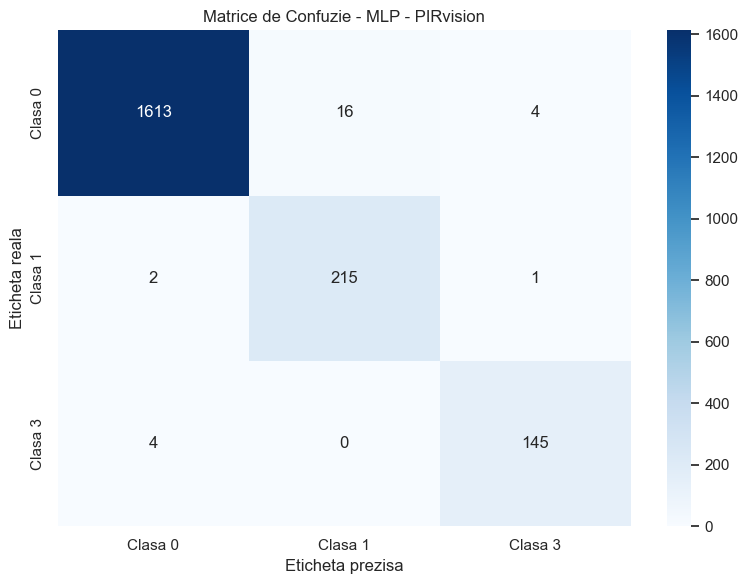

=== Evaluare MLP - PIRvision ===
Acuratete: 0.9865
              precision    recall  f1-score   support

     Clasa 0       1.00      0.99      0.99      1633
     Clasa 1       0.93      0.99      0.96       218
     Clasa 3       0.97      0.97      0.97       149

    accuracy                           0.99      2000
   macro avg       0.96      0.98      0.97      2000
weighted avg       0.99      0.99      0.99      2000



In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Pregatire date
cols_to_drop = ["Class", "Timestamp", "Day"]
X_train_mlp = pir_scaled.drop(columns=cols_to_drop, errors="ignore")
X_test_mlp = pir_test_scaled.drop(columns=cols_to_drop, errors="ignore")
y_train_mlp = pir_scaled["Class"]
y_test_mlp = pir_test_scaled["Class"]

# Codificare etichete
le_mlp = LabelEncoder()
y_train_encoded = le_mlp.fit_transform(y_train_mlp)
y_test_encoded = le_mlp.transform(y_test_mlp)

# Antrenare MLP
mlp_pir = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=300,
    batch_size=64,
    early_stopping=True,
    random_state=42
)
mlp_pir.fit(X_train_mlp, y_train_encoded)

# Curba de loss
plt.plot(mlp_pir.loss_curve_, label="Train Loss")
plt.title("Curba de pierdere (Loss) - MLP PIRvision")
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Curba de acuratete pe setul de antrenament
plt.plot(mlp_pir.validation_scores_, label="Validation Accuracy", color='orange')
plt.title("Curba de performanta (Validation Accuracy) - MLP PIRvision")
plt.xlabel("Epoca")
plt.ylabel("Acuratete")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Matrice de confuzie
y_pred_mlp = mlp_pir.predict(X_test_mlp)
conf_mat = confusion_matrix(y_test_encoded, y_pred_mlp)
tick_labels = [f"Clasa {c}" for c in le_mlp.classes_]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Matrice de Confuzie - MLP - PIRvision")
plt.xlabel("Eticheta prezisa")
plt.ylabel("Eticheta reala")
plt.tight_layout()
plt.show()

# Evaluare
print("=== Evaluare MLP - PIRvision ===")
print(f"Acuratete: {accuracy_score(y_test_encoded, y_pred_mlp):.4f}")
print(classification_report(y_test_encoded, y_pred_mlp, target_names=tick_labels))


Multi-Layered Perceptron (MLP) - Poluare Aer

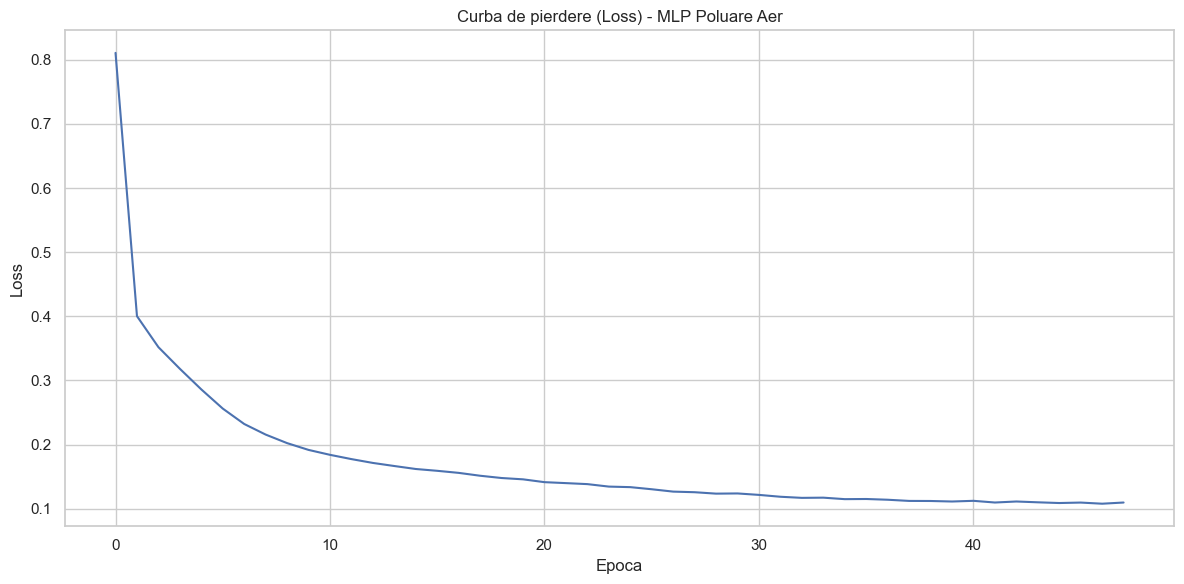

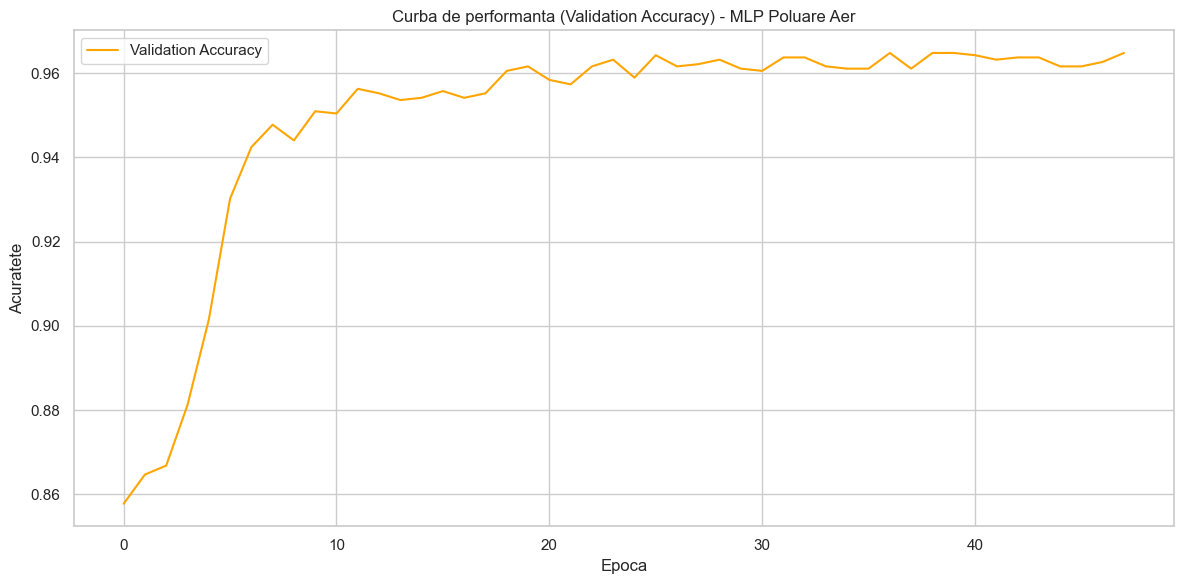

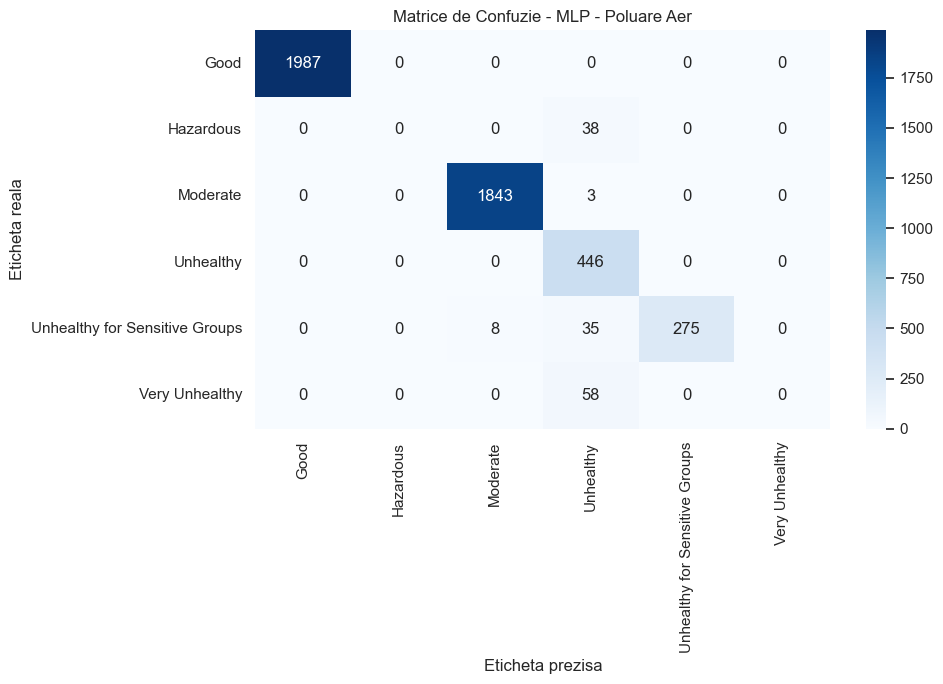

=== Evaluare MLP - Poluare Aer ===
Acuratete: 0.9697
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1987
                     Hazardous       0.00      0.00      0.00        38
                      Moderate       1.00      1.00      1.00      1846
                     Unhealthy       0.77      1.00      0.87       446
Unhealthy for Sensitive Groups       1.00      0.86      0.93       318
                Very Unhealthy       0.00      0.00      0.00        58

                      accuracy                           0.97      4693
                     macro avg       0.63      0.64      0.63      4693
                  weighted avg       0.96      0.97      0.96      4693



C:\Users\frome\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\frome\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\frome\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Pregatire date (folosim doar atribute numerice, ca la regresie logistica)
X_train_mlp = poluare_scaled.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"])
X_test_mlp = poluare_test_scaled.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"])

y_train_mlp = poluare_scaled["Overall AQI Level"]
y_test_mlp = poluare_test_scaled["Overall AQI Level"]

# Codificare etichete
le_mlp = LabelEncoder()
y_train_encoded = le_mlp.fit_transform(y_train_mlp)
y_test_encoded = le_mlp.transform(y_test_mlp)

# Antrenare MLP
mlp_pol = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=300,
    batch_size=64,
    early_stopping=True,
    random_state=42
)
mlp_pol.fit(X_train_mlp, y_train_encoded)

# Curba de pierdere (loss)
plt.plot(mlp_pol.loss_curve_, label="Train Loss")
plt.title("Curba de pierdere (Loss) - MLP Poluare Aer")
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

# Curba de acuratete pe setul de antrenament
plt.plot(mlp_pol.validation_scores_, label="Validation Accuracy", color='orange')
plt.title("Curba de performanta (Validation Accuracy) - MLP Poluare Aer")
plt.xlabel("Epoca")
plt.ylabel("Acuratete")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# PAS 4: Predictii si evaluare
y_pred_mlp = mlp_pol.predict(X_test_mlp)

conf_mat = confusion_matrix(y_test_encoded, y_pred_mlp)
tick_labels = le_mlp.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Matrice de Confuzie - MLP - Poluare Aer")
plt.xlabel("Eticheta prezisa")
plt.ylabel("Eticheta reala")
plt.tight_layout()
plt.show()

print("=== Evaluare MLP - Poluare Aer ===")
print(f"Acuratete: {accuracy_score(y_test_encoded, y_pred_mlp):.4f}")
print(classification_report(y_test_encoded, y_pred_mlp, target_names=tick_labels))


Tabel comparativ al performanței algoritmilor de clasificare pe seturile de date PIRvision și Poluare Aer

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Configuratii comune
algorithms = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=5, max_features="sqrt", class_weight="balanced", random_state=42),
    "Logistic Regression": LogisticRegression(solver="lbfgs", max_iter=1000, class_weight="balanced", random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.001, learning_rate_init=0.001, max_iter=300, batch_size=64, early_stopping=True, random_state=42)
}

datasets = {
    "PIRvision": {
        "X_train": pir_scaled.drop(columns=["Class", "Timestamp", "Day"], errors="ignore"),
        "X_test": pir_test_scaled.drop(columns=["Class", "Timestamp", "Day"], errors="ignore"),
        "y_train": pir_scaled["Class"],
        "y_test": pir_test_scaled["Class"]
    },
    "Poluare Aer": {
        "X_train": poluare_scaled.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"]),
        "X_test": poluare_test_scaled.drop(columns=["Overall AQI Level"], errors="ignore").select_dtypes(include=["int64", "float64"]),
        "y_train": poluare_scaled["Overall AQI Level"],
        "y_test": poluare_test_scaled["Overall AQI Level"]
    }
}

# Generam tabelul 
table_data = []

for dataset_name, data in datasets.items():
    le = LabelEncoder()
    y_train_enc = le.fit_transform(data["y_train"])
    y_test_enc = le.transform(data["y_test"])

    for algo_name, model in algorithms.items():
        model.fit(data["X_train"], y_train_enc)
        y_pred = model.predict(data["X_test"])
        report = classification_report(y_test_enc, y_pred, output_dict=True)
        acc = accuracy_score(y_test_enc, y_pred)

        row = {"Model": f"{algo_name} - {dataset_name}", "Accuracy": acc}
        for cls in sorted([int(c) for c in report if c.isdigit()]):
            row[f"Precizie clasa {cls}"] = report[str(cls)]["precision"]
            row[f"Recall clasa {cls}"] = report[str(cls)]["recall"]
            row[f"F1 clasa {cls}"] = report[str(cls)]["f1-score"]
        table_data.append(row)

#  Transformam in DataFrame
df = pd.DataFrame(table_data).fillna(0)

#  Bolduim valorile maxime
def bold_max(series):
    max_val = series.max()
    return [f"**{val:.4f}**" if val == max_val else f"{val:.4f}" for val in series]

for col in df.columns[1:]:
    df[col] = bold_max(df[col])

# Afisare finala
from IPython.display import display
display(df)


C:\Users\frome\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\frome\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\frome\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

,Model,Accuracy,Precizie clasa 0,Recall clasa 0,F1 clasa 0,Precizie clasa 1,Recall clasa 1,F1 clasa 1,Precizie clasa 2,Recall clasa 2,F1 clasa 2,Precizie clasa 3,Recall clasa 3,F1 clasa 3,Precizie clasa 4,Recall clasa 4,F1 clasa 4,Precizie clasa 5,Recall clasa 5,F1 clasa 5
0,Decision Tree - PIRvision,0.9890,0.9981,0.9884,0.9932,0.9188,0.9862,0.9513,**1.0000**,**1.0000**,**1.0000**,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,Random Forest - PIRvision,**0.9935**,0.9988,0.9933,0.9960,**0.9515**,**0.9908**,**0.9708**,**1.0000**,**1.0000**,**1.0000**,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,Logistic Regression - PIRvision,0.8845,0.9757,0.8867,0.9291,0.7717,0.9771,0.8623,0.4500,0.7248,0.5553,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,MLP - PIRvision,0.9865,0.9963,0.9878,0.9920,0.9307,0.9862,0.9577,0.9667,0.9732,0.9699,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,Decision Tree - Poluare Aer,0.9416,**1.0000**,**1.0000**,**1.0000**,0.1442,0.3947,0.2113,**1.0000**,**1.0000**,**1.0000**,**0.8179**,0.5942,0.6883,**1.0000**,**0.8899**,**0.9418**,0.1544,0.3966,0.2222
5,Random Forest - Poluare Aer,0.9482,**1.0000**,**1.0000**,**1.0000**,0.1485,0.3947,0.2158,0.9984,**1.0000**,0.9992,0.8154,0.6637,0.7318,**1.0000**,**0.8899**,**0.9418**,**0.2091**,0.3966,**0.2738**
6,Logistic Regression - Poluare Aer,0.7569,0.9876,0.9985,0.9930,0.0580,0.6842,0.1070,**1.0000**,0.6002,0.7502,0.5962,0.2848,0.3854,0.5683,**0.8899**,0.6936,0.0576,**0.4138**,0.1011
7,MLP - Poluare Aer,0.9697,**1.0000**,**1.0000**,**1.0000**,0.0000,0.0000,0.0000,0.9957,0.9984,0.9970,0.7690,**1.0000**,**0.8694**,**1.0000**,0.8648,0.9275,0.0000,0.0000,0.0000
